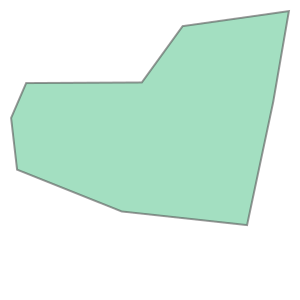

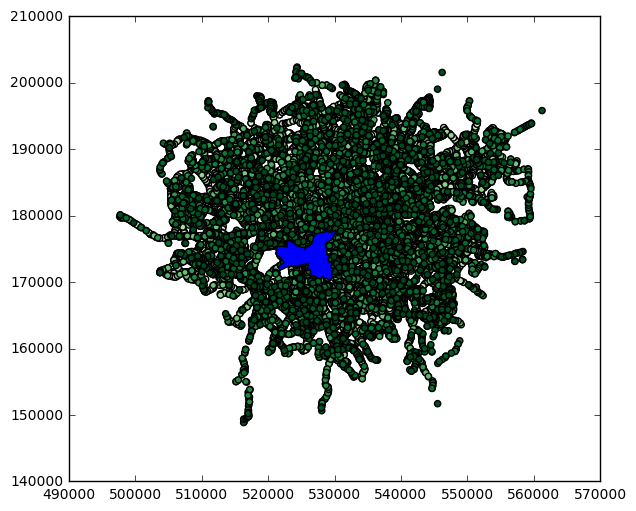

In [144]:
%matplotlib inline
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

fp = "/Users/Andrew/Python_GIS/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp"
bd = pd.read_csv("/Users/Andrew/Python_GIS/bus_stops.csv")
busData = bd[["Location_Easting", "Location_Northing"]]

gd = gpd.GeoDataFrame(bd, geometry=gpd.points_from_xy(bd.Location_Easting, bd.Location_Northing))
map_df = gpd.GeoDataFrame.from_file(fp)

map_df = map_df.loc[map_df['GSS_CODE'] == 'E09000032']

coords = [(521084.0, 172814.0), (524824,171319), 
          (529304, 170832), (530238, 175230), (530799,178480), (527002,177943), (525542,175929), (521409,175908), 
          (520871,174660)]
poly = Polygon(coords)

fig, ax = plt.subplots(1, figsize=(10, 6))

gd.plot(cmap='Greens', ax=ax)
map_df.plot(ax=ax)

gd["Is In Wandsworth"] = gd.within(poly)
gd.to_excel("Wand Output.xlsx")

poly